# Notebook 04: Modeling


Need to install this first https://anaconda.org/conda-forge/imbalanced-learn

The risk of loss comes from misclassifying Subprime as Prime.
Money would have been spent on marketing and sales of Premium wine.
That said, there is a cost for misclassifying Prime as Subprime, but the
exposure is less because money would not be spent on marketing and sales.


### Import libraries

In [1]:
# Standard libraries
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# library to handle imbalanced classes
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline as imbPipeline

# scikit items
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import (train_test_split, learning_curve, StratifiedKFold,
                                    cross_validate, cross_val_score, GridSearchCV)
from sklearn.metrics import (accuracy_score, recall_score, confusion_matrix, roc_curve,
                             auc, make_scorer, precision_score)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Remove deprecation warnings
import warnings
warnings.simplefilter('ignore', category = DeprecationWarning)

# import homemade functions
from misc_functions import *

Using TensorFlow backend.
/opt/miniconda3/envs/metis/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/miniconda3/envs/metis/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/miniconda3/envs/metis/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/miniconda3/envs/metis/lib/python3.7/sit

### Import pickled dataframe

In [2]:
#recall that cw stands for combined wine
with open('./combo_wines_cleaned.pickle', 'rb') as read_file:
    cwraw = pickle.load(read_file)

In [3]:
cwraw.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,redness,class
index,,,,,,,,,,,,,,
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1,0
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1,0


In [4]:
#rename class to Class to as class is python object
cwraw.rename(columns = {'class': 'Class'}, inplace = True)
cwraw.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,redness,Class
index,,,,,,,,,,,,,,
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1,0


#### Remove `quality` from dataframe

In [5]:
cw = cwraw[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'redness', 'Class']]

In [6]:
cw.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'redness', 'Class'],
      dtype='object')

In [7]:
cw.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,redness,Class
index,,,,,,,,,,,,,
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1,0


In [8]:
cw.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,redness,Class
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,0.246114,0.196552
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.430779,0.397421
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,0.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,0.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,0.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,0.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,1.000000,1.000000


### Define New X after PCA

In [9]:
# Get features of X
cw_features = cw.columns[:-1].to_list()

In [10]:
X = cw.iloc[:, :-1]
y = cw.iloc[:, -1]

### Splitting Train / Test Sets (with stratification)

In [11]:
X_train, X_test, y_train, y_test = train_test_split( X, y,
                                                   test_size=0.20,
                                                   stratify=y)

In [12]:
#Check that the stratification works.  That is, do both sets have same proportion of classes 0&1?

types_of_y = [y_train, y_test]
proportion = [(each.value_counts(normalize=True)*100).values for each in types_of_y]

pd.DataFrame(np.r_[proportion], index=['% train', '% test'],
            columns = ['Class-0', 'Class-1'])

,Class-0,Class-1
% train,80.354050,19.645950
% test,80.307692,19.692308


## Get a `baseline` performance for several models
-Logistic Regression  
-Random Forest  
-KNN

In [13]:
#NOTE: HAVE TO STRATIFY THE k-fold!
#use a var to hold the stratified object so that it can be called on subsequent models
skf = StratifiedKFold(n_splits=10, random_state=123)

In [14]:
pipe_lr = imbPipeline([
                        ('oversample', RandomOverSampler(random_state=0)),
                        ('scaling', StandardScaler()),
                        ('logreg', LogisticRegression())
                        ])

eval_lr = cross_validate(pipe_lr, X_train, y_train,
                        cv=skf,
                        scoring=('accuracy', 'recall', 'precision'),
                        verbose=1,
                        return_train_score=True)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/opt/miniconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/miniconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/miniconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/miniconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/miniconda3/envs/metis/lib/python3.7/site-p

In [15]:
pipe_rf = imbPipeline([
                        ('oversample', RandomOverSampler(random_state=0)),
                        ('RandomForest', RandomForestClassifier())
                        ])
eval_rf = cross_validate(pipe_rf, X_train, y_train,
                        cv=skf,
                        scoring=('accuracy', 'recall', 'precision'),
                        verbose=1,
                        return_train_score=True)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/opt/miniconda3/envs/metis/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/miniconda3/envs/metis/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/miniconda3/envs/metis/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/miniconda3/envs/metis/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  

In [16]:
pipe_knn = imbPipeline([
                        ('oversample', RandomOverSampler(random_state=0)), 
                        ('knn', KNeighborsClassifier(n_neighbors=10))
                       ])

eval_knn = cross_validate(pipe_knn, X_train, y_train,
                        cv=skf,
                        scoring=('accuracy', 'recall', 'precision'),
                        verbose=1,
                        return_train_score=True)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    5.4s finished


In [17]:
#Make a df of the cross_validate results
df_lr = pd.DataFrame(np.c_[['Logistic\nRegression' for _ in range(10)],
                          np.arange(1, 11),
                          eval_lr['test_accuracy'],
                          eval_lr['test_recall'],
                          eval_lr['test_precision'],
                          ],
                    columns = ['model', 'fold_id', 'accuracy', 'recall', 'precision'])
df_rf = pd.DataFrame(np.c_[['Random\nForest' for _ in range(10)],
                          np.arange(1,11),
                          eval_rf['test_accuracy'],
                          eval_rf['test_recall'],
                          eval_rf['test_precision'],
                          ],
                    columns = ['model', 'fold_id', 'accuracy', 'recall', 'precision'])
df_knn = pd.DataFrame(np.c_[['knn' for _ in range(10)],
                          np.arange(1,11),
                          eval_knn['test_accuracy'],
                          eval_knn['test_recall'],
                          eval_knn['test_precision'],
                          ],
                    columns = ['model', 'fold_id', 'accuracy', 'recall', 'precision'])

df_both = pd.concat([df_lr, df_rf, df_knn], axis = 0)
df_both['accuracy'] = df_both['accuracy'].astype(float)
df_both['recall'] = df_both['recall'].astype(float)
df_both['precision'] = df_both['precision'].astype(float)

In [18]:
#Checkout the results
df_both.groupby('model')[['accuracy', 'recall','precision']].mean().sort_values(by='accuracy',ascending=False)

,accuracy,recall,precision
model,,,
Random\nForest,0.877047,0.599410,0.727564
Logistic\nRegression,0.719838,0.755178,0.390163
knn,0.708101,0.679745,0.368196


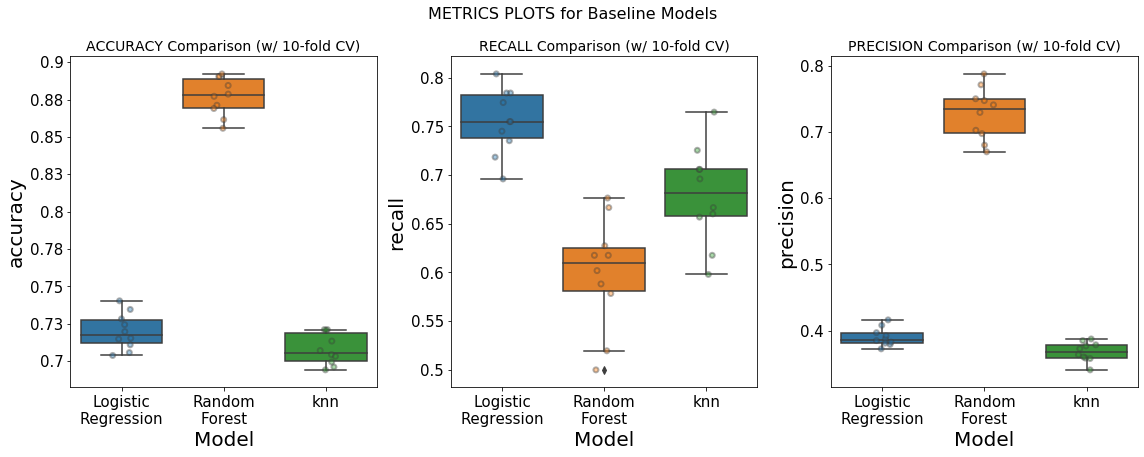

In [19]:
plot_metrics(df_both)

## Splitting Training set further into `TRAIN` & `VALidation` Sets (with stratification) 

In [20]:
X_train_TRAIN, X_train_VAL, y_train_TRAIN, y_train_VAL = train_test_split( X_train, y_train,
                                                   test_size=0.20,
                                                   stratify=y_train)

In [21]:
pipe_lr = imbPipeline([
                        ('oversample', RandomOverSampler(random_state=0)),
                        ('scaling', StandardScaler()),
                        ('logreg', LogisticRegression())
                        ])

pipe_rf = imbPipeline([
                        ('oversample', RandomOverSampler(random_state=0)),
                        ('RandomForest', RandomForestClassifier())
                        ])

pipe_knn = imbPipeline([
                        ('oversample', RandomOverSampler(random_state=0)), 
                        ('knn', KNeighborsClassifier(n_neighbors=5))
                       ])

pipelines_baseline={'Logistic\nRegression':pipe_lr, 'Random\Forest':pipe_rf, 'KNN':pipe_knn}

/opt/miniconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/miniconda3/envs/metis/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


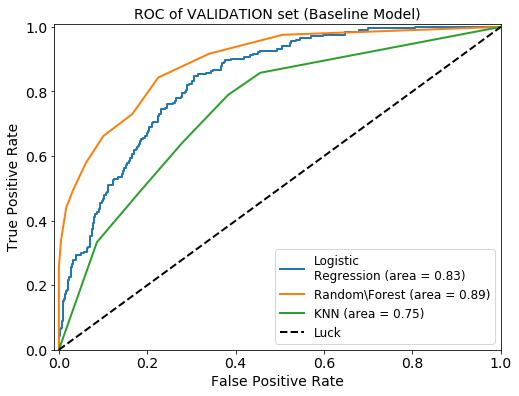

In [22]:
plot_ROC_baseline(pipelines_baseline, X_train_TRAIN, y_train_TRAIN, X_train_VAL,y_train_VAL)

**Notes:**
- Random Forest seems to be the best model to use

METRICS and CONFUSION Matrices for VALIDATION sets

For Logistic
Regression
Accuracy : 0.74
Recall   : 0.78
Precision: 0.42

 [[612 224]
 [ 45 159]]


/opt/miniconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



For Random\Forest
Accuracy : 0.89
Recall   : 0.63
Precision: 0.75

 [[793  43]
 [ 75 129]]

For KNN
Accuracy : 0.70
Recall   : 0.64
Precision: 0.36

 [[602 234]
 [ 73 131]]


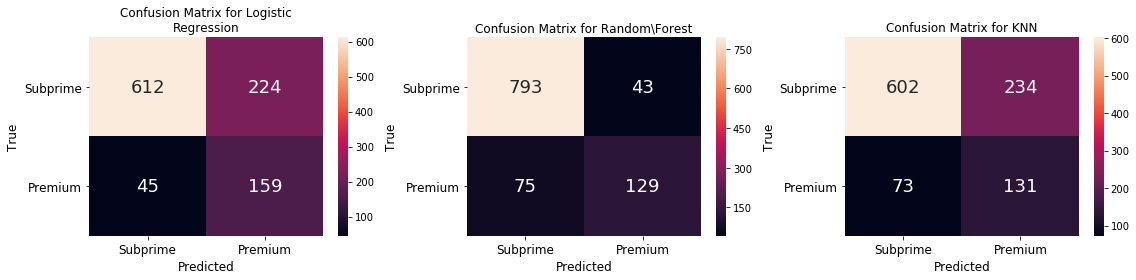

In [23]:
plot_confusion(pipelines_baseline, X_train_TRAIN, y_train_TRAIN, X_train_VAL, y_train_VAL)

---

---

## Using Tuned LogReg, RandomForest & KNN, optimized for `PRECISION`

##### Importing model with best hyperparameters (from `03_Tuning_Precision.ipynb`)

In [24]:
# # Pickle objects
with open('./gridsearched_Precision_lr.pkl','rb') as read_file:
    grid_Precision_lr = pickle.load(read_file)
with open('./gridsearched_Precision_rf.pkl','rb') as read_file:
    grid_Precision_rf = pickle.load(read_file)
with open('./gridsearched_Precision_knn.pkl' ,'rb') as read_file:
    grid_Precision_knn = pickle.load(read_file)

#### Look at tuned parameters for the 3 models

In [25]:
[model.best_params_ for model in [grid_Precision_lr, grid_Precision_rf, grid_Precision_knn]]

[{'logreg__C': 7.742636826811269,
  'logreg__max_iter': 100,
  'logreg__penalty': 'l1',
  'logreg__solver': 'liblinear'},
 {'RandomForest__bootstrap': False,
  'RandomForest__max_depth': 5,
  'RandomForest__max_features': 'auto',
  'RandomForest__min_samples_leaf': 1,
  'RandomForest__min_samples_split': 2,
  'RandomForest__n_estimators': 80},
 {'knn__n_neighbors': 2}]

In [26]:
# Make pipelines 
pipelines_prec = [
    ['LogReg', imbPipeline([
        ('oversample', RandomOverSampler(random_state=0)),
        ('scaling', StandardScaler()),
        ('logreg', LogisticRegression(C=1, max_iter=100, penalty='l2',solver='liblinear'))
    ])],
    ['RandFor', imbPipeline([
        ('oversample', RandomOverSampler(random_state=0)),
        ('RandomForest', RandomForestClassifier(max_depth=5, max_features='auto',min_samples_leaf=2, min_samples_split=2, n_estimators=50, bootstrap=False))
    ])],
    ['pipe_knn', imbPipeline([
                        ('oversample', RandomOverSampler(random_state=0)),
                        ('knn', KNeighborsClassifier(n_neighbors=2, weights='uniform'))
    ])]
]

In [27]:
evals = [cross_validate(pipelines_prec[ind][1], X_train, y_train,
                        cv=skf,
                        scoring=('accuracy', 'recall', 'precision'),
                        verbose=1,
                        return_train_score=True) for ind in range(3)]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    3.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    4.5s finished


In [28]:
#Make a df of the cross_validate results
names= ['Logistic\nRegression','Random\nForest','Knn']
dfs_precisions = [pd.DataFrame(np.c_[[names[ind] for _ in range(10)],
                          np.arange(1, 11),
                          evals[ind]['test_accuracy'],
                          evals[ind]['test_recall'],
                          evals[ind]['test_precision'],
                          ],
                    columns = ['model', 'fold_id', 'accuracy', 'recall', 'precision']) for ind in range(3)]

dfs_summary_precisions = pd.DataFrame([],columns = ['model', 'fold_id', 'accuracy', 'recall', 'precision'])
for ind in range(3):
    dfs_summary_precisions = pd.concat([dfs_summary_precisions, dfs_precisions[ind]], axis=0)
dfs_summary_precisions['accuracy'] = dfs_summary_precisions['accuracy'].astype(float)
dfs_summary_precisions['recall'] = dfs_summary_precisions['recall'].astype(float)
dfs_summary_precisions['precision'] = dfs_summary_precisions['precision'].astype(float)

In [29]:
dfs_summary_precisions.groupby('model')[['recall','accuracy','precision']].mean().sort_values(by='precision', ascending=False)

,recall,accuracy,precision
model,,,
Knn,0.534771,0.816050,0.532613
Random\nForest,0.786493,0.762169,0.441400
Logistic\nRegression,0.755178,0.719838,0.390163


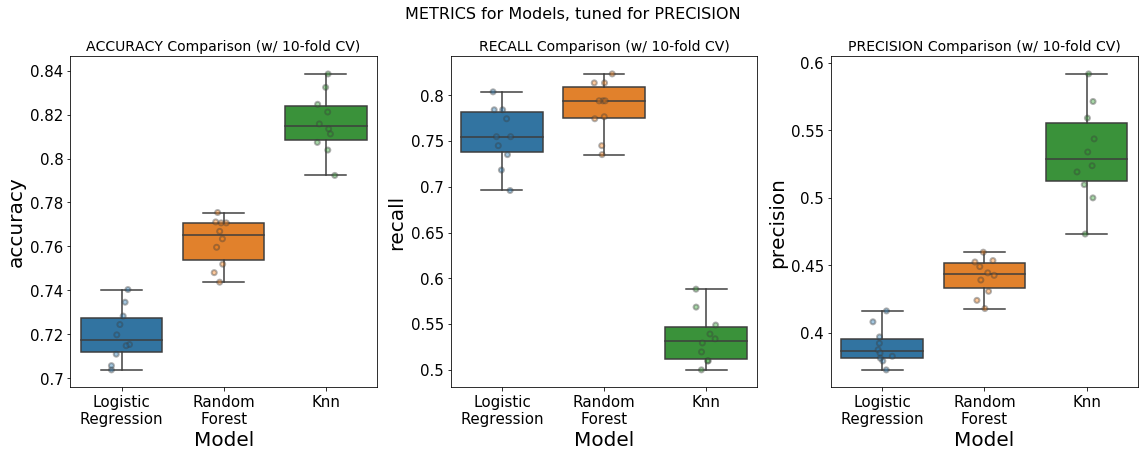

In [30]:
plot_metrics(dfs_summary_precisions, title='METRICS for Models, tuned for PRECISION')

In [31]:
X_train_TRAIN, X_train_VAL, y_train_TRAIN, y_train_VAL = train_test_split( X_train, y_train,
                                                   test_size=0.20,
                                                   stratify=y_train)

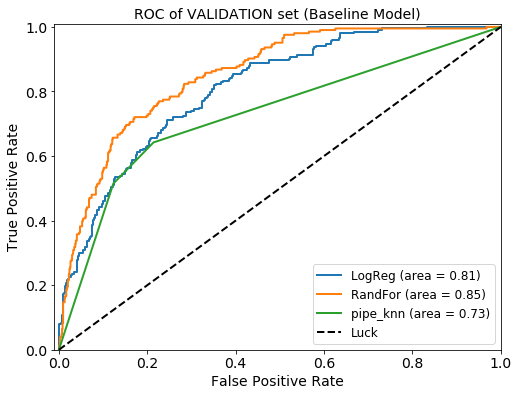

In [32]:
plot_ROC_model(pipelines_prec, X_train_TRAIN, y_train_TRAIN, X_train_VAL,y_train_VAL)

METRICS and CONFUSION Matrices for VALIDATION sets

For LogReg
Accuracy : 0.70
Recall   : 0.74
Precision: 0.37

 [[581 255]
 [ 53 151]]

For RandFor
Accuracy : 0.74
Recall   : 0.78
Precision: 0.42

 [[613 223]
 [ 44 160]]

For pipe_knn
Accuracy : 0.81
Recall   : 0.51
Precision: 0.50

 [[733 103]
 [ 99 105]]


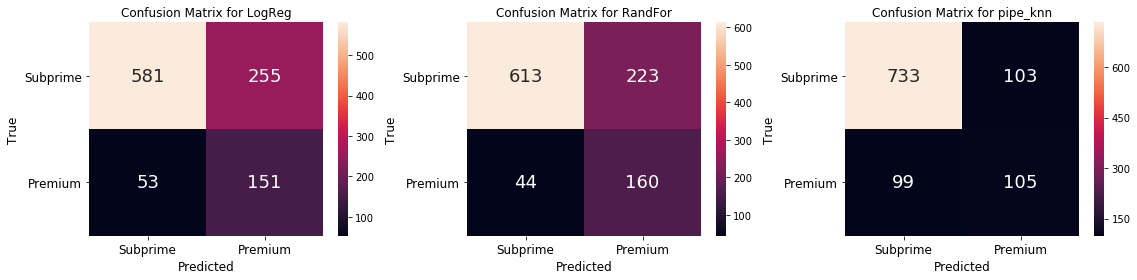

In [33]:
plot_confusion_model(pipelines_prec,X_train_TRAIN, y_train_TRAIN, X_train_VAL, y_train_VAL )

---

### Now, predict on TEST set and Plot 

In [34]:
# Make pipelines 
pipelines_prec = [
    ['LogReg', imbPipeline([
        ('oversample', RandomOverSampler(random_state=0)),
        ('scaling', StandardScaler()),
        ('logreg', LogisticRegression())
    ])],
    ['RandFor', imbPipeline([
        ('oversample', RandomOverSampler(random_state=0)),
        ('RandomForest', RandomForestClassifier())
    ])],
    ['pipe_knn', imbPipeline([
                        ('oversample', RandomOverSampler(random_state=0)),
                        ('knn', KNeighborsClassifier(n_neighbors=2, weights='uniform'))
    ])]
]

/opt/miniconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/miniconda3/envs/metis/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


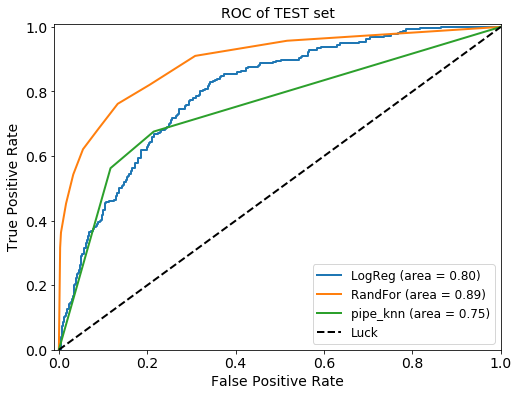

In [35]:
plot_ROC_final(pipelines_prec, X_train, y_train, X_test, y_test)

### Plot Confusion Matrix 

/opt/miniconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



For LogReg
Accuracy : 0.72
Recall   : 0.76
Precision: 0.39

For RandFor
Accuracy : 0.88
Recall   : 0.62
Precision: 0.72

For pipe_knn
Accuracy : 0.82
Recall   : 0.56
Precision: 0.54


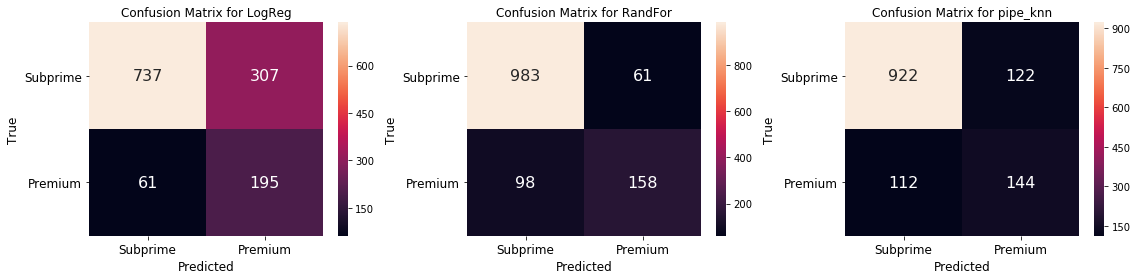

In [36]:
plot_confusion_final(pipelines_prec, X_train, y_train, X_test, y_test)

---

### Train the entire dataset
- Use RandomOversampler
- Use RandomForestClassifier
- Pickle the model for Flask app deployment

In [37]:
# Train dataset with chosen Model on the entire dataset
data   = cw.iloc[:,:-1]
labels = cw.iloc[:, -1]
deployment_model = pipelines_prec[1][1].fit(data, labels)

In [38]:
from collections import Counter

ros = RandomOverSampler(random_state = 42)
X_res, y_res = ros.fit_resample(X,y)
print(Counter(y_res))

Counter({0: 5220, 1: 5220})


In [39]:
rf = RandomForestClassifier()
rf.fit(X_res, y_res)

/opt/miniconda3/envs/metis/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### Plot feature of importances

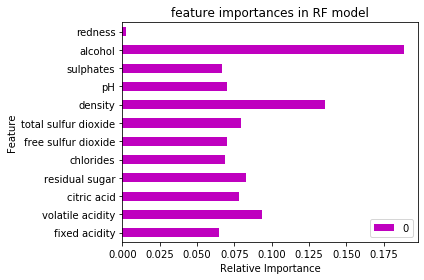

In [45]:
pd.DataFrame(np.r_[rf.feature_importances_.reshape(-1,1)], index=X_train.columns, columns=['importance']).sort_values(by='importance').plot(kind='barh', color = 'm');

plt.title('feature importances in RF model');
plt.xlabel("Relative Importance")
plt.ylabel("Feature")

plt.tight_layout()
plt.savefig('FeatureImportance', dpi=150)

In [41]:
# with open('./RandomForestFinal.pkl','wb') as fout:
#     pickle.dump(rf, fout)

---